In [56]:
# This section of the coursework will focus on analysing the dataset and implementing the Random Forest Classifier Model
#
#
# We will analyse the features, create a Random Forest Classifier Model, implement it, and evaluate it
#
#
# Importing the libraries that will be used initially for data reading, visualisation, and modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
# Reading the London_bike_data.csv and storing it in df
df = pd.read_csv("London_bike_data.csv")
# My hypothesis is that the hour, day of the week, and the temperature will have the highest impact on the bike_rented variable

In [58]:
# Outputting the number of rows and columns in the dataset
df.shape

(13060, 12)

In [59]:
# The head function is giving us more insight on what the FIRST records within the dataset are and how they are represented
df.head()

,id,date,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,bike_rented
0,8650,2016-01-01,6,3,0,1,3.0,0.0,87.0,10.0,1,very low
1,9383,2016-01-31,19,3,1,0,14.0,14.0,77.0,35.0,3,low
2,12036,2016-05-22,8,0,1,0,14.5,14.5,65.0,6.5,1,low
3,2404,2015-04-14,11,0,0,0,18.0,18.0,54.0,21.5,1,medium
4,7406,2015-11-09,21,2,0,0,15.0,15.0,82.0,31.5,4,medium


In [60]:
# The tail function is giving us more insight on what the LAST records within the dataset are and how they are represented
df.tail()

,id,date,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,bike_rented
13055,5876,2015-09-06,10,2,1,0,14.0,14.0,63.0,8.0,1,high
13056,5541,2015-08-23,11,1,1,0,22.0,22.0,63.0,10.0,3,very high
13057,10575,2016-03-21,19,0,0,0,9.0,7.5,60.0,10.0,3,high
13058,5126,2015-08-06,4,1,0,0,18.0,18.0,64.0,10.0,1,very low
13059,1048,2015-02-16,17,3,0,0,8.0,7.5,87.0,5.0,7,high


In [61]:
# Convert the 'date' column to datetime format to enable easy extraction of year, month, and day
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new column 'year'
# This is useful for analyzing data on a yearly basis, such as identifying yearly trends and to make possible predictions
df['year'] = df['date'].dt.year

# Extract the month from the 'date' column and create a new column 'month'
# This allows for monthly analysis, which can be important for understanding seasonal or monthly patterns
df['month'] = df['date'].dt.month

# Extract the day from the 'date' column and create a new column 'day'
# Analyzing data on a daily basis can help in identifying daily patterns or outliers
df['day'] = df['date'].dt.day

# Drop the original 'date' column as it's no longer necessary after extracting year, month, and day
# This helps in simplifying the dataset and focusing on the extracted features for analysis
df.drop(columns=['date'], inplace=True)

In [62]:
# Now that we've extracted the new columns, we need to recheck the columns for the number of tuples, their datatypes, and values.
# The info function will give us more insight on these questions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13060 entries, 0 to 13059
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 13060 non-null  int64  
 1   hour               13060 non-null  int64  
 2   season             13060 non-null  int64  
 3   is_weekend         13060 non-null  int64  
 4   is_holiday         13060 non-null  int64  
 5   temperature        13060 non-null  float64
 6   temperature_feels  13060 non-null  float64
 7   humidity           13060 non-null  float64
 8   wind_speed         13060 non-null  float64
 9   weather_code       13060 non-null  int64  
 10  bike_rented        13060 non-null  object 
 11  year               13060 non-null  int64  
 12  month              13060 non-null  int64  
 13  day                13060 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.4+ MB


In [63]:
# We can now see that all of the independent variables/columns in this dataset are numerical.
# To gain more statistical analysis of the values, we can use describe() function
# It will show the count, mean, standard deviation, min and max values, 25th, 50th, and 75th percentiles
# We can create boxplots for the continuous numerical data columns (temperature, temperature_feels, humidity, wind_speed) to 
# visualise the data below
# 
df.describe()

,id,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,year,month,day
count,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000
mean,8699.206891,11.497320,1.488974,0.285835,0.021822,12.460784,11.512506,72.403407,15.885094,2.716309,2015.506738,6.516233,15.746861
std,5008.757529,6.920567,1.118707,0.451828,0.146109,5.573487,6.618541,14.264575,7.883711,2.348494,0.507574,3.442588,8.783426
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,2015.000000,1.000000,1.000000
25%,4365.500000,6.000000,0.000000,0.000000,0.000000,8.000000,6.000000,63.000000,10.000000,1.000000,2015.000000,4.000000,8.000000
50%,8697.500000,12.000000,1.000000,0.000000,0.000000,12.500000,12.500000,75.000000,15.000000,2.000000,2016.000000,7.000000,16.000000
75%,13038.250000,18.000000,2.000000,1.000000,0.000000,16.000000,16.000000,83.000000,20.500000,3.000000,2016.000000,10.000000,23.000000
max,17414.000000,23.000000,3.000000,1.000000,1.000000,34.000000,34.000000,100.000000,56.500000,26.000000,2017.000000,12.000000,31.000000


In [64]:
# Checking if the null values are present in the dataset
df.isnull()

,id,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,bike_rented,year,month,day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13055,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13056,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13057,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13058,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
# As the dataset is too large to manually check for null values, we use .sum() to add all counts of null values
# We can see that the dataset includes only non-null values
df.isnull().sum()

id                   0
hour                 0
season               0
is_weekend           0
is_holiday           0
temperature          0
temperature_feels    0
humidity             0
wind_speed           0
weather_code         0
bike_rented          0
year                 0
month                0
day                  0
dtype: int64

In [66]:
# Now, as we learned more about the dataset, we should gain more understanding about the target variable 'bike_rented'
# This is a categorical column, consisting of 5 categories: low, very low, high, very high, medium
# Lets look at the counts of each category in the bike_rented variable
# Setting up the countplot or a bar chart, will further help us understand the distribution of the bike_rented table
df["bike_rented"].value_counts()

low          2642
very low     2629
high         2620
very high    2592
medium       2577
Name: bike_rented, dtype: int64

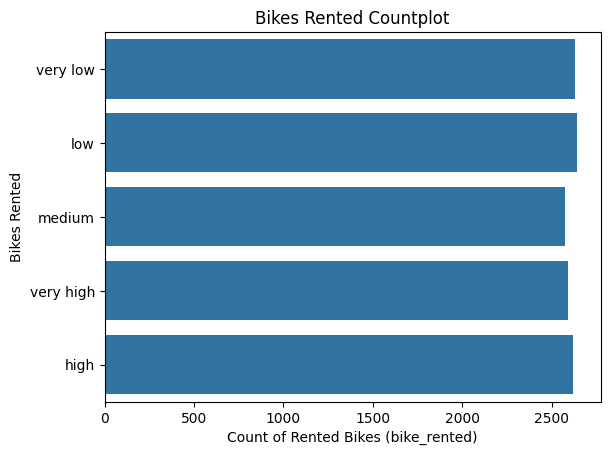

In [67]:
#Setting up the countplot of the bike_rented that displays the value of counts
sns.countplot(df["bike_rented"])
plt.ylabel("Bikes Rented")
plt.xlabel("Count of Rented Bikes (bike_rented)")
plt.title("Bikes Rented Countplot")
plt.show()
# As we can see from the countplot, there is a uniform/even distribution of categories
# This means, that the bikes are being rented out at a close rate for each category
# We can now try to find some correlations between continuous independent variables and bikes_rented by using the boxplots

<AxesSubplot: xlabel='temperature_feels', ylabel='bike_rented'>

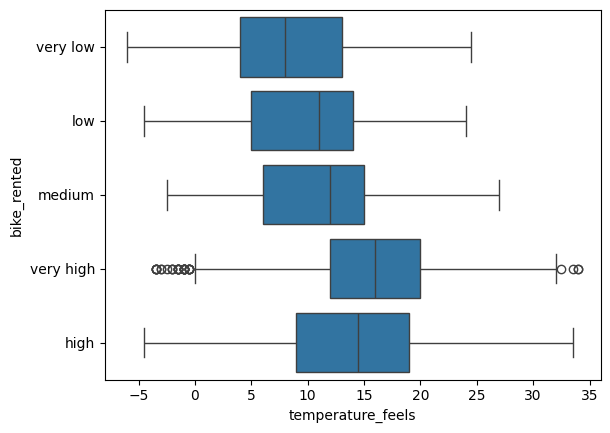

In [68]:
sns.boxplot(y=df["bike_rented"], x=df["temperature_feels"]) 
# After graphing this boxplot, we can conclude that there is a positive correlation between temperature feels and the number of 
# bikes rented
# However, as we know, we cannot imply causation just because there is correlation, so we have to analyze more data
# Therefore, we can graph boxplots for temperature, humidity, and wind_speed

<AxesSubplot: xlabel='temperature', ylabel='bike_rented'>

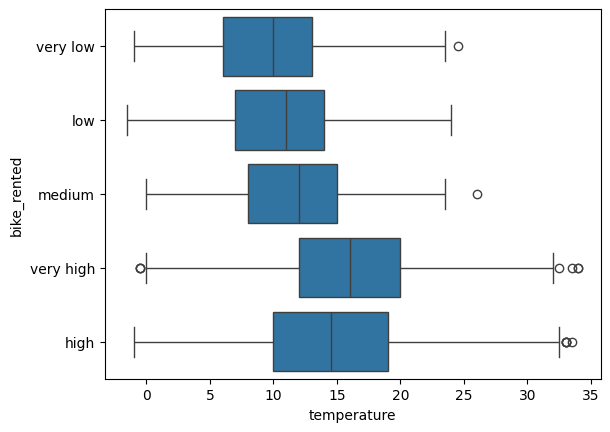

In [69]:
sns.boxplot(y=df["bike_rented"], x=df["temperature"]) 
# After graphing this boxplot, we can see similar results compared to the previous graph.
# This is happening because temperature_feels values are caused with the actual temperature values
# Let's make more boxplots, to gain more insights

<AxesSubplot: xlabel='humidity', ylabel='bike_rented'>

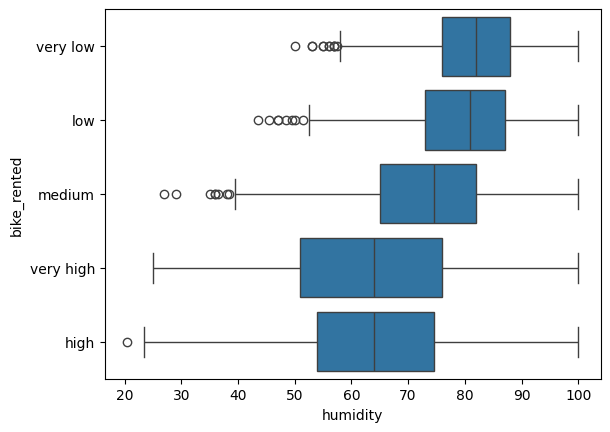

In [70]:
sns.boxplot(y=df["bike_rented"], x=df["humidity"]) 
# This boxplot shows that there are more bikes rented, when the humidity is lower
# There are some outliers for the very low/low/medium categories, however these numbers do not significantly affect the other categories
# The humidity still shows a strong correlation, thus still making it an important feature
# Let's move on to graph the wind_speed x bike_rented boxplot

<AxesSubplot: xlabel='wind_speed', ylabel='bike_rented'>

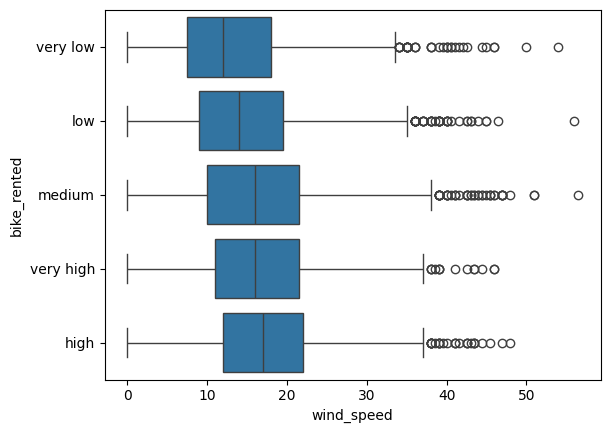

In [71]:
sns.boxplot(y=df['bike_rented'], x=df['wind_speed'])
# There is still correlation in the graph. 
# It is a positive correlation, with higher wind speeds indicating higher number of bikes rented
# This boxplot has a very high number of outliers, which we cannot ignore
# It might have a strong negative impact on the accuracy of the model.
# Because of those reasons, this column might be dropped later after we feature the importances and try to improve the accuracy of 
# the model
# Let's now move on to create 

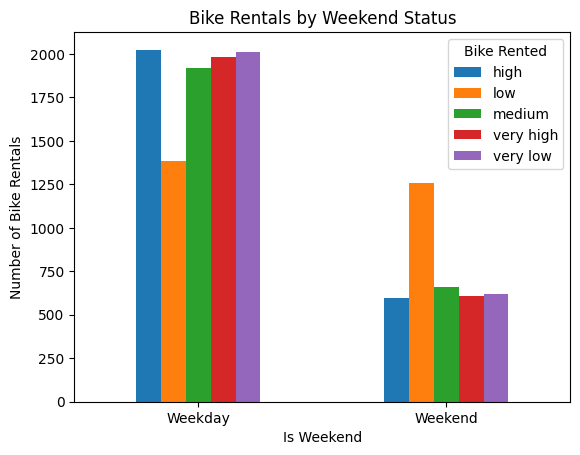

In [72]:
# Creating a new dataframe that aggregates bike rentals by the 'is_weekend' attribute
bike_rentals_weekend = df.groupby('is_weekend')['bike_rented'].value_counts().unstack(fill_value=0)

# Plotting the bar chart
bike_rentals_weekend.plot(kind='bar', stacked=False)
plt.title('Bike Rentals by Weekend Status')
plt.xlabel('Is Weekend')
plt.ylabel('Number of Bike Rentals')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.legend(title='Bike Rented')
plt.show()
# Now we can see that that bike_rented are low on the weekends, and tend to be rented more 

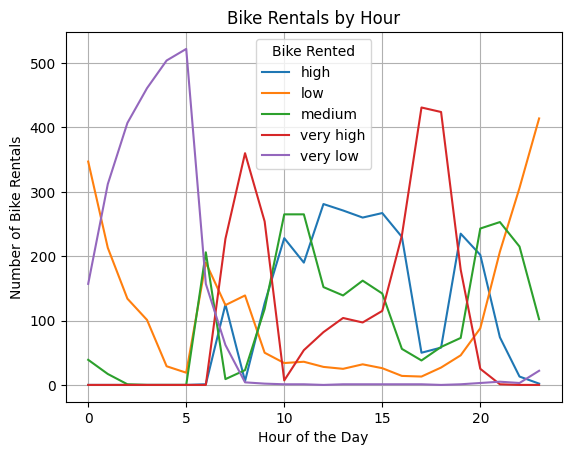

In [73]:
# Creating a line plot for bike_rented value counts by hour
bike_rentals_hourly = df.groupby('hour')['bike_rented'].value_counts().unstack(fill_value=0)

bike_rentals_hourly.plot(kind='line')
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rentals')
plt.legend(title='Bike Rented')
plt.grid(True)
plt.show()

# We can see that the highest number of bikes are rented out approximately between 7 AM - 8 AM and 4 PM - 6 PM
# This could be like that because people are likely to use bikes during peak hours to commute to jobs
# We can see that the hours have a very high importance on the bike_rented value

In [74]:
# Splitting the dataframe 'df' into features (X) and target variable (y)

# Selecting features for the model
# The first part, df.iloc[:, :10], selects all rows and the first 10 columns of the dataframe 'df'
# The second part, df.iloc[:, 11:], selects all rows and columns starting from the 12th column to the end
# These two parts are then joined together to form the features dataframe 'X', excluding the 'bike_rented' column (which is the 11th column)
X = df.iloc[:, :10].join(df.iloc[:, 11:]) 

# Selecting the target variable for the model
# df.iloc[:, 10] selects all rows and only the 11th column ('bike_rented'), which is our target variable
# This column is stored in 'y', which will be used as the target variable for model training
y = df.iloc[:, 10] 

# The 'X' dataframe now contains the features that will be used to predict the target variable 'y'
# The 'y' series contains the labels that our model will try to predict
# This setup is a common practice in supervised learning tasks, where 'X' is used for training/testing the model, and 'y' is what we aim to predict

In [75]:
#Checking the X.shape to confirm the number of rows and columns to ensure that the data was split correctly
X.shape

(13060, 13)

In [76]:
#Checking the y.shape to confirm the number of rows and columns to ensure that the data was split correctly
y.shape

(13060,)

In [77]:
# Importing the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features, y represents the target variable
# random_state is set to ensure reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [78]:
# Importing the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of the RandomForestClassifier Model with specific these parameters:
# criterion = "gini" specifies the function to measure the quality of a split.
# max_depth = 8 limits the maximum depth of the tree to prevent overfitting.
# min_samples_split = 10 requires at least 10 samples to split an internal node.
# random_state = 99 ensures that the splits that you generate are reproducible. Specific random states ensure the same results are generated each time the code is run.
clf = RandomForestClassifier(criterion = "gini", 
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 99)

In [79]:
# Now fit the model
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=99)

In [80]:
# Now we are accessing the feature importances of the trained RandomForestClassifier model
# This attribute returns an array of values indicating the importance of each feature in the model
# Higher values indicate more important features in predicting the target variable
clf.feature_importances_

array([0.02726125, 0.57253004, 0.01287229, 0.07176153, 0.00282735,
       0.06262975, 0.060253  , 0.10398649, 0.02104123, 0.02875959,
       0.00233618, 0.02003345, 0.01370785])

In [81]:
# Displaying the columns in an array format.
# However, a better visualisation would be more helpful
df.columns

Index(['id', 'hour', 'season', 'is_weekend', 'is_holiday', 'temperature',
       'temperature_feels', 'humidity', 'wind_speed', 'weather_code',
       'bike_rented', 'year', 'month', 'day'],
      dtype='object')

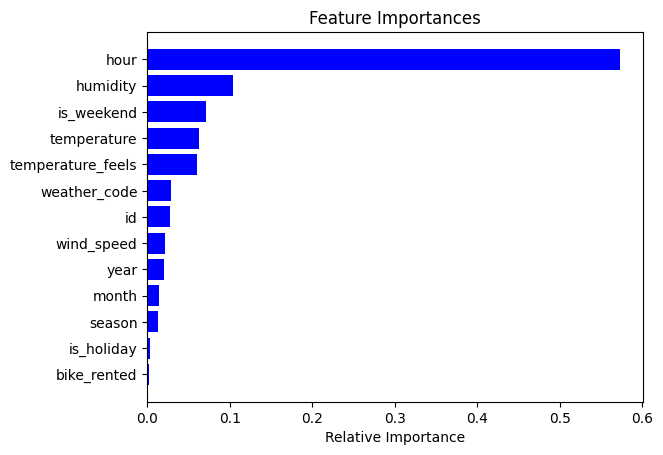

In [82]:
# Extract column names from the dataframe
features = df.columns
# Get the feature importances from the classifier
importances = clf.feature_importances_
# Get the indices that would sort the importances array
indices = np.argsort(importances)

# Set the title of the plot
plt.title('Feature Importances')
# Create a horizontal bar chart to display the feature importances
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
# Set the y-ticks to be the feature names, in the order of their importance
plt.yticks(range(len(indices)), [features[i] for i in indices])
# Label the x-axis as "Relative Importance"
plt.xlabel("Relative Importance")
# Display the plot
plt.show()

In [83]:
# Making predictions based on unseen X_test data with the trained clf model. It includes the 20% of the total data,
# as the training was done on the other 80%, which is usually a standard
y_pred = clf.predict(X_test)

In [84]:
# Outputting the predictions in an array
y_pred

array(['very low', 'medium', 'medium', ..., 'very high', 'very high',
       'medium'], dtype=object)

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[362,  12, 204,  74,   0],
       [  2, 475, 106,   5,  57],
       [ 76,  78, 453,  15,   0],
       [ 62,   6,  99, 496,   0],
       [  0,  55,   2,   0, 626]])

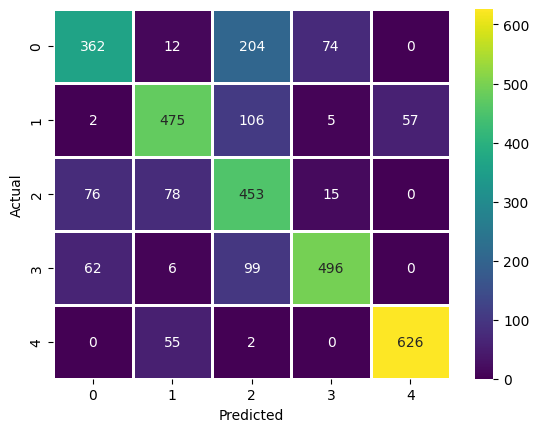

In [86]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', linewidths=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# The confusion matrix visually shows the performance of the classification model.
# Each cell in the matrix represents the number of predictions for each actual and predicted class combination.
# The diagonal cells represent correct predictions, while off-diagonal cells indicate misclassifications.


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7387442572741194

In [88]:
from sklearn.model_selection import cross_val_score
# We are doing the K-Fold Cross Validation with 10 folds, as it is recommended for the larger datasets (more than 10,000 entries)
# This would reduce the impact of individual folds on the model accuracy. 
# This line of code, prints the cross validation scores for each fold.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.76428571, 0.73979592, 0.70102041, 0.72346939, 0.73469388,
       0.69969356, 0.72727273, 0.72318693, 0.73033708, 0.73953013])

In [89]:
from sklearn.metrics import classification_report
# Here we get the classification report for our model
# We can see that the weighted avg accuracy is 0.75, meaning that the model correctly predicted the class in 3/4 cases based
# on the attributes
print(classification_report(y_pred, y_test))
# The model was very precise and with a high recall in predicting the low category of bikes rented in London in each day and hour


              precision    recall  f1-score   support

        high       0.56      0.72      0.63       502
         low       0.74      0.76      0.75       626
      medium       0.73      0.52      0.61       864
   very high       0.75      0.84      0.79       590
    very low       0.92      0.92      0.92       683

    accuracy                           0.74      3265
   macro avg       0.74      0.75      0.74      3265
weighted avg       0.75      0.74      0.74      3265



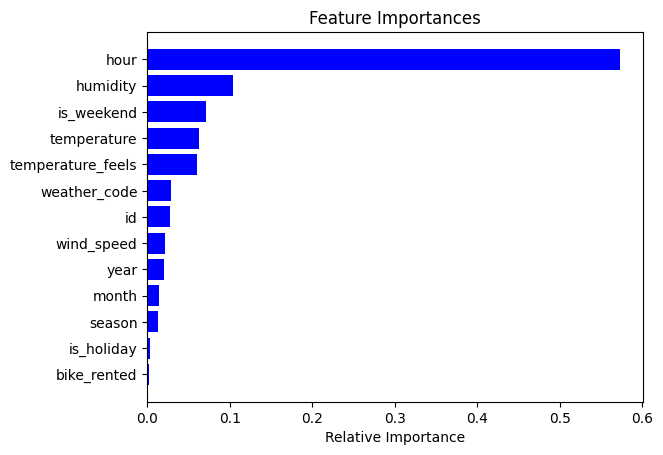

In [90]:
# Extract column names from the dataframe
features = df.columns
# Get the feature importances from the classifier
importances = clf.feature_importances_
# Get the indices that would sort the importances array
indices = np.argsort(importances)

# Set the title of the plot
plt.title('Feature Importances')
# Create a horizontal bar chart to display the feature importances
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
# Set the y-ticks to be the feature names, in the order of their importance
plt.yticks(range(len(indices)), [features[i] for i in indices])
# Label the x-axis as "Relative Importance"
plt.xlabel("Relative Importance")
# Display the plot
plt.show()

In [91]:
# Although, we were happy with the results, we want to experiment on the model by dropping low importance attributes and then using a random forest classifier model.
df.drop(columns = ['weather_code', 'id', 'wind_speed', 'year', 'month', 'season', 'is_holiday'], inplace=True)

In [92]:
# As we can see, the columns were dropped
# Let's construct a Random Forest Classifier Model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13060 entries, 0 to 13059
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour               13060 non-null  int64  
 1   is_weekend         13060 non-null  int64  
 2   temperature        13060 non-null  float64
 3   temperature_feels  13060 non-null  float64
 4   humidity           13060 non-null  float64
 5   bike_rented        13060 non-null  object 
 6   day                13060 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 714.3+ KB


In [93]:
X = df.iloc[:, :5].join(df.iloc[:, 6:]) 
y = df.iloc[:, 5] 
# The 'X' dataframe now contains the features that will be used to predict the target variable 'y'
# The 'y' series contains the labels that our model will try to predict

In [94]:
# Splitting the dataset into training and testing sets
# X represents the features, y represents the target variable
# random_state is set to ensure reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [95]:
# Now fit the new model
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=99)

In [96]:
# Making predictions with a new model
y_pred = clf.predict(X_test)

In [97]:
# Printing the predictions of new model
y_pred

array(['very low', 'very high', 'medium', ..., 'very high', 'very high',
       'low'], dtype=object)

In [98]:
# Printing the confusion matrix of the new model
# The differences with the initial confusion matrix will be discussed along with the proper visualisation
confusion_matrix(y_test, y_pred)

array([[393,   7, 168,  84,   0],
       [  1, 453, 138,   4,  49],
       [ 83,  85, 440,  14,   0],
       [ 74,   1,  56, 532,   0],
       [  0,  61,   4,   2, 616]])

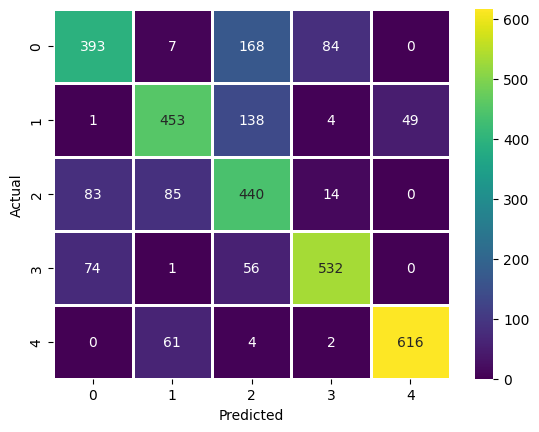

In [99]:
# Visualising the new confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', linewidths=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# When comparing to the initial confusion matrix, we can see that the model became more accurate in predicting the
# values for very high and high categories, while the predictions became less precise for low and very low categories

In [100]:
accuracy_score(y_test, y_pred)
# After printing the accuracy score, we see that dropping non-important features did not make a signicant impact on the
# accuracy of the model

0.7454823889739663

In [101]:
# Checking the cross validation scores for the new model. 
# No significant differences from the initial model
cross_val_score(clf, X_train, y_train, cv=10)

array([0.77040816, 0.77653061, 0.72244898, 0.7255102 , 0.73877551,
       0.73135853, 0.76404494, 0.75280899, 0.75280899, 0.75383044])

In [102]:
# In the classification report, we can see some minor changes in predictions for each class
# For example, the precision for high and very high classes, has increased,
# while, the precision for very low, low, and medium classes has dropped.
# Overall accuracy did not significantly change
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        high       0.60      0.71      0.65       551
         low       0.70      0.75      0.72       607
      medium       0.71      0.55      0.62       806
   very high       0.80      0.84      0.82       636
    very low       0.90      0.93      0.91       665

    accuracy                           0.75      3265
   macro avg       0.74      0.75      0.75      3265
weighted avg       0.75      0.75      0.74      3265



Conclusion:
The hour, day of the week, and temperature had the most impact on the prediction model. Therefore, we confirmed our hypothesis. 
In addition to that, we discovered that the Random Forest Classifier model is working efficiently on larger (categorical) datasets and gained valuable insights about the database itself. It was also discovered, that dropping non-important features in this given case did not significantly impact the prediction results of the model. Therefore, we can conclude that in this case, the outliers and features with low correlation values did not have a strong impact on the model and that the model was resistant to these kind of flaws in the database. 